In [38]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
sns.set_theme(palette='colorblind', font_scale=1.1)

In [49]:
base_folder = Path(os.path.expanduser('~')) / 'Documents' / 'afpd' / 'T_kodakarensis'

In [50]:
bait_id = 'Q9Y8I1__Q9Y8I1'
control_id = 'Q9Y8I1'

In [51]:
bait_df = pd.read_csv(
    base_folder / 'outputs' / f'{bait_id}_pulldown_scores_annotated.csv', 
    index_col='target_uniprot_id',
)
control_df = pd.read_csv(
    base_folder / 'outputs' / f'{control_id}_pulldown_scores_annotated.csv',
    index_col='target_uniprot_id',
)

In [53]:
ctrl_index = control_df.index

def compute_diff_with_ctrl(row):
    target_id = row.name

    confidence = row['confidence']
    if target_id in ctrl_index:
        confidence_ctrl = control_df.loc[target_id, 'confidence']

        return confidence - confidence_ctrl
    else:
        return np.nan


bait_df['rank'] = [i+1 for i in range(len(bait_df))]
bait_df['ctrl_diff'] = bait_df.apply(compute_diff_with_ctrl, axis=1)

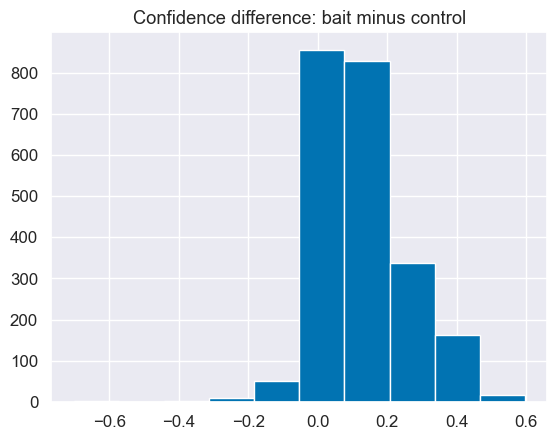

In [57]:
ax = bait_df['ctrl_diff'].hist();
ax.set_title('Confidence difference: bait minus control');

In [64]:
bait_df[bait_df['confidence'] > 0.7]

,id,plddt,ptm,iptm,dockq,confidence,target_description,rank,ctrl_diff
target_uniprot_id,,,,,,,,,
Q5JD83,Q9Y8I1__Q9Y8I1__Q5JD83,90.33,0.87,0.81,1.048,0.822,Uncharacterized protein OS=Thermococcus kodaka...,1,0.210
Q5JEV1,Q9Y8I1__Q9Y8I1__Q5JEV1,92.54,0.88,0.80,1.048,0.816,Exonuclease SbcD homolog OS=Thermococcus kodak...,2,0.422
Q5JIN1,Q9Y8I1__Q9Y8I1__Q5JIN1,93.57,0.83,0.80,1.048,0.806,Uncharacterized protein OS=Thermococcus kodaka...,3,0.596
Q5JJ15,Q9Y8I1__Q9Y8I1__Q5JJ15,90.49,0.82,0.78,1.048,0.788,"Hypothetical membrane protein, conserved OS=Th...",4,0.024
Q5JGS6,Q9Y8I1__Q9Y8I1__Q5JGS6,91.50,0.81,0.77,1.048,0.778,Uncharacterized protein OS=Thermococcus kodaka...,5,0.524
Q5JI67,Q9Y8I1__Q9Y8I1__Q5JI67,94.15,0.82,0.76,1.048,0.772,DUF3368 domain-containing protein OS=Thermococ...,6,0.532
Q5JE08,Q9Y8I1__Q9Y8I1__Q5JE08,92.52,0.79,0.74,1.048,0.750,Nucleotidyltransferase OS=Thermococcus kodakar...,7,0.494
Q5JJB5,Q9Y8I1__Q9Y8I1__Q5JJB5,86.66,0.81,0.73,1.048,0.746,Uncharacterized protein OS=Thermococcus kodaka...,8,0.446
Q5JHQ7,Q9Y8I1__Q9Y8I1__Q5JHQ7,95.08,0.81,0.73,1.048,0.746,FCP1 homology domain-containing protein OS=The...,9,0.400


In [65]:
bait_df_sorted = bait_df.sort_values('ctrl_diff', ascending=False)
bait_df_sorted[bait_df_sorted['confidence'] > 0.7]

,id,plddt,ptm,iptm,dockq,confidence,target_description,rank,ctrl_diff
target_uniprot_id,,,,,,,,,
Q5JIN1,Q9Y8I1__Q9Y8I1__Q5JIN1,93.57,0.83,0.80,1.048,0.806,Uncharacterized protein OS=Thermococcus kodaka...,3,0.596
Q5JDY4,Q9Y8I1__Q9Y8I1__Q5JDY4,89.38,0.79,0.72,1.048,0.734,Uncharacterized protein OS=Thermococcus kodaka...,10,0.548
Q5JI67,Q9Y8I1__Q9Y8I1__Q5JI67,94.15,0.82,0.76,1.048,0.772,DUF3368 domain-containing protein OS=Thermococ...,6,0.532
Q5JJ49,Q9Y8I1__Q9Y8I1__Q5JJ49,90.79,0.76,0.70,1.048,0.712,PqqD family protein OS=Thermococcus kodakarens...,19,0.530
Q5JGS6,Q9Y8I1__Q9Y8I1__Q5JGS6,91.50,0.81,0.77,1.048,0.778,Uncharacterized protein OS=Thermococcus kodaka...,5,0.524
Q8NKS1,Q9Y8I1__Q9Y8I1__Q8NKS1,92.51,0.78,0.72,1.048,0.732,Hydrogenase-specific maturation endopeptidase ...,11,0.512
Q5JE08,Q9Y8I1__Q9Y8I1__Q5JE08,92.52,0.79,0.74,1.048,0.750,Nucleotidyltransferase OS=Thermococcus kodakar...,7,0.494
Q5JIC0,Q9Y8I1__Q9Y8I1__Q5JIC0,91.65,0.77,0.71,1.048,0.722,HEPN domain-containing protein OS=Thermococcus...,14,0.474
Q5JJB5,Q9Y8I1__Q9Y8I1__Q5JJB5,86.66,0.81,0.73,1.048,0.746,Uncharacterized protein OS=Thermococcus kodaka...,8,0.446


In [47]:
bait_df_sorted.tail()

,id,plddt,ptm,iptm,dockq,confidence,target_description,rank,ctrl_diff
target_uniprot_id,,,,,,,,,
Q5JDK9,Q9Y8I1__Q9Y8I1__Q5JDK9,54.44,0.32,0.24,1.048,0.256,CARDB domain-containing protein OS=Thermococcu...,2221,-0.276
Q5JI09,Q9Y8I1__Q9Y8I1__Q5JI09,92.62,0.74,0.33,1.048,0.412,"Oxidoreductase, aldo/keto reductase family OS=...",671,-0.346
Q5JES5,Q9Y8I1__Q9Y8I1__Q5JES5,86.92,0.68,0.27,1.048,0.352,"Lipoate-protein ligase A, N-terminal section O...",1344,-0.374
Q9Y8I2,Q9Y8I1__Q9Y8I1__Q9Y8I2,76.27,0.57,0.46,1.048,0.482,Archaeal histone B OS=Thermococcus kodakarensi...,362,-0.428
Q9Y8I1,Q9Y8I1__Q9Y8I1__Q9Y8I1,67.78,0.41,0.17,1.048,0.218,Archaeal histone A OS=Thermococcus kodakarensi...,2265,-0.702
